In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import pylab as pl
%matplotlib inline
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('/Users/Bunny/Documents/Prasanthi/Springboard/Capstone Project 1/Capstone 1 /Bank Marketing dataset/bank-additional/bank-additional-full.csv', delimiter=';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
#replace unknown with np.NaN
df = df.replace('unknown', np.NaN)
df.head()

#replace column name 'y' as 'outcome'
df= df.rename(columns = {'y':'outcome'})
df

#Total number of rows and columns 
np.shape(df)

(41188, 21)

In [6]:
#Find % of missing values for each attribute
df.isnull().sum()/41188*100

age                0.000000
job                0.801204
marital            0.194231
education          4.202680
default           20.872584
housing            2.403613
loan               2.403613
contact            0.000000
month              0.000000
day_of_week        0.000000
duration           0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp.var.rate       0.000000
cons.price.idx     0.000000
cons.conf.idx      0.000000
euribor3m          0.000000
nr.employed        0.000000
outcome            0.000000
dtype: float64

In [7]:
# As default has 20.8% missing values, it`s better to drop that column for further study
df_drop = df.drop('default',1)
np.shape(df_drop)

(41188, 20)

In [8]:
#Since most of the observations have 999 which means majority of clients were not previously contacted
#hence this variable adds no further value
df_drop = df_drop.drop('pdays',1)

In [9]:
# dropping rest of the NaNs from the database to create the final dataset used for testing
bank_df = df_drop.dropna(axis = 0)
bank_df.notnull().sum()

age               38245
job               38245
marital           38245
education         38245
housing           38245
loan              38245
contact           38245
month             38245
day_of_week       38245
duration          38245
campaign          38245
previous          38245
poutcome          38245
emp.var.rate      38245
cons.price.idx    38245
cons.conf.idx     38245
euribor3m         38245
nr.employed       38245
outcome           38245
dtype: int64

In [10]:
# checking the % distribution of Dependent variable categories in the dataset
count = bank_df.age.count()
a = bank_df.groupby('outcome').size()#/count*100
a

outcome
no     33987
yes     4258
dtype: int64

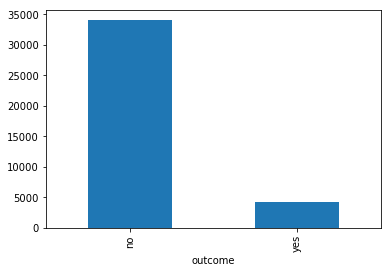

In [11]:
a.plot(kind = 'bar')

In [12]:
#Assigning dummy variables to categorical data with (k-1) dummies
dummy_df = pd.get_dummies(bank_df,drop_first= True)
dummy_df.head()

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,outcome_yes
0,56,261,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,1,0,0
1,57,149,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,1,0,0
2,37,226,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,1,0,0
3,40,151,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,1,0,0
4,56,307,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,1,0,0


In [13]:
#Adding the intercept
dummy_df['intercept'] = 1.0

# Index(all independent variable columns, dtype=object)
train_cols = dummy_df.columns[:-1]

#Performing logistic regression on cleansed dataset
logit = sm.Logit(dummy_df['outcome_yes'], dummy_df[train_cols])

#fit the model
result = logit.fit()

PerfectSeparationError: Perfect separation detected, results not available

In [14]:
result.summary()

NameError: name 'result' is not defined